#Anomaly Detection & Time Series |
Assignment

1. What is Anomaly Detection? Explain its types (point, contextual, and
collective anomalies) with examples.
   - Anomaly Detection is the process of identifying unusual patterns, behaviors, or data points that deviate significantly from the normal or expected behavior in a dataset. These anomalies often indicate critical events such as fraud, faults, cyber-attacks, or errors. There are three main types of anomalies: **Point anomalies**, where a single data point is significantly different from the rest (e.g., a sudden bank transaction of ₹10,00,000 when most transactions are below ₹10,000); **Contextual anomalies**, which are abnormal only within a specific context (e.g., a temperature of 35°C is normal in summer but unusual in winter, or high network traffic at midnight instead of peak business hours); and **Collective anomalies**, where a group of related data points collectively form an anomaly even if individual points appear normal (e.g., multiple failed login attempts in a short time indicating a brute-force attack, or a series of unusual trading patterns suggesting insider trading). These types of anomalies help in detecting rare and potentially harmful events across domains like finance, cybersecurity, healthcare, and manufacturing.


2. Compare Isolation Forest, DBSCAN, and Local Outlier Factor in terms of
their approach and suitable use cases.
  - **Isolation Forest, DBSCAN, and Local Outlier Factor (LOF)** are three widely used anomaly detection methods, each with different approaches and suitable applications. **Isolation Forest** works on the principle of isolating anomalies by randomly partitioning the data; since anomalies are easier to isolate, they require fewer partitions. It is highly efficient for high-dimensional datasets and is commonly used in fraud detection, network intrusion detection, and large-scale data applications. **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)** is a clustering-based method that identifies anomalies as points lying in low-density regions, far from dense clusters. It is best suited for spatial data, irregularly shaped clusters, and applications like geographical mapping or detecting noise in sensor networks. **Local Outlier Factor (LOF)** measures the local density of each point and identifies anomalies as points with significantly lower density compared to their neighbors. It is ideal when data has varying densities, making it effective for tasks such as fraud detection, intrusion detection, and medical diagnosis where local patterns matter. In summary, Isolation Forest is efficient for large high-dimensional data, DBSCAN is useful for clustering-based anomaly detection in spatial or density-varying data, and LOF is well-suited for local density-based anomaly detection where subtle deviations are important.


3. What are the key components of a Time Series? Explain each with one
example.
   - A **Time Series** is a sequence of data points collected or recorded at regular time intervals, and its key components help in understanding patterns and making predictions. The first component is **Trend**, which represents the long-term movement or overall direction of the data over time, such as the steady rise in the number of mobile phone users over several years. The second is **Seasonality**, which refers to repeating short-term patterns that occur at fixed intervals due to seasonal factors, for example, higher ice cream sales every summer. The third component is **Cyclic patterns**, which are long-term fluctuations that occur due to business or economic cycles but are not of fixed length, such as the rise and fall of stock markets during economic booms and recessions. Lastly, **Irregular or Random variations** capture unexpected or unpredictable factors that cannot be explained by trend, seasonality, or cycles, such as a sudden drop in tourism due to a natural disaster or pandemic. Together, these components provide a complete view of time series behavior and are essential for accurate forecasting and analysis.


4. Define Stationary in time series. How can you test and transform a
non-stationary series into a stationary one?
   - In time series, a series is said to be **stationary** if its statistical properties such as mean, variance, and autocorrelation remain constant over time, meaning the data does not depend on when it is observed. Stationarity is important because many forecasting models like ARIMA assume the series to be stationary for reliable predictions. To **test stationarity**, common methods include visual inspection using plots, the **Augmented Dickey-Fuller (ADF) test**, and the **KPSS test**, which check whether unit roots exist in the series. If a time series is found to be non-stationary, it can be transformed into a stationary one using techniques such as **differencing** (subtracting current values from previous values to remove trend), **log or square root transformation** (to stabilize variance), and **seasonal differencing** (removing repeating seasonal effects). For example, stock prices usually show trends and are non-stationary, but taking their first difference (price change instead of actual price) often makes the series stationary and suitable for modeling.


5. Differentiate between AR, MA, ARIMA, SARIMA, and SARIMAX models in
terms of structure and application.
   - **AR, MA, ARIMA, SARIMA, and SARIMAX** are statistical models used for time series forecasting, each with distinct structures and applications. **AR (AutoRegressive)** models use the dependency between an observation and its past values, making them suitable for data with strong autocorrelation, like predicting future sales based on past sales. **MA (Moving Average)** models rely on the dependency between an observation and past forecast errors, often useful for smoothing random fluctuations in short-term forecasting. **ARIMA (AutoRegressive Integrated Moving Average)** combines AR and MA components with **differencing (I)** to handle non-stationary data, making it versatile for general time series forecasting such as stock prices or demand prediction. **SARIMA (Seasonal ARIMA)** extends ARIMA by adding seasonal components to capture repeating patterns at fixed intervals, making it effective for data with both trend and seasonality, such as monthly electricity consumption. Finally, **SARIMAX (Seasonal ARIMA with Exogenous variables)** further extends SARIMA by including external predictors (exogenous variables), allowing the model to incorporate outside influences like weather, holidays, or economic indicators; for example, forecasting ice cream sales based not only on past sales and seasonality but also on temperature data. In summary, AR and MA capture basic dependencies, ARIMA handles trend and stationarity, SARIMA adds seasonality, and SARIMAX incorporates external factors for richer forecasting.


6. Load a time series dataset (e.g., AirPassengers), plot the original series,
and decompose it into trend, seasonality, and residual components
(Include your Python code and output in the code box below.)

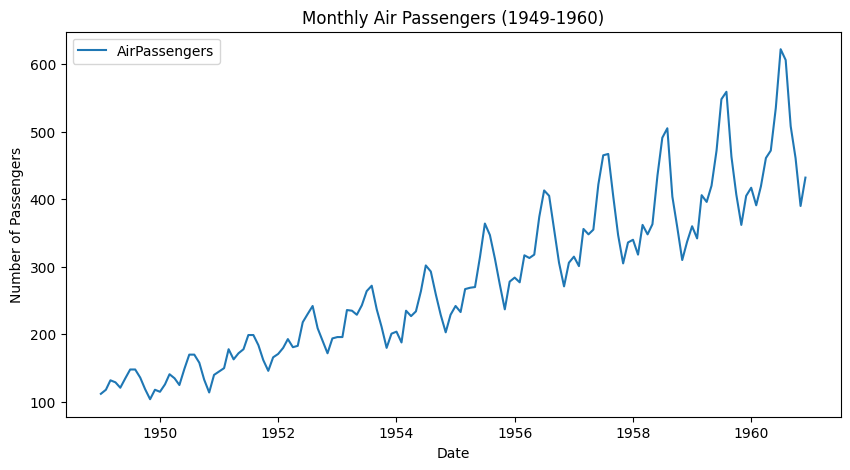

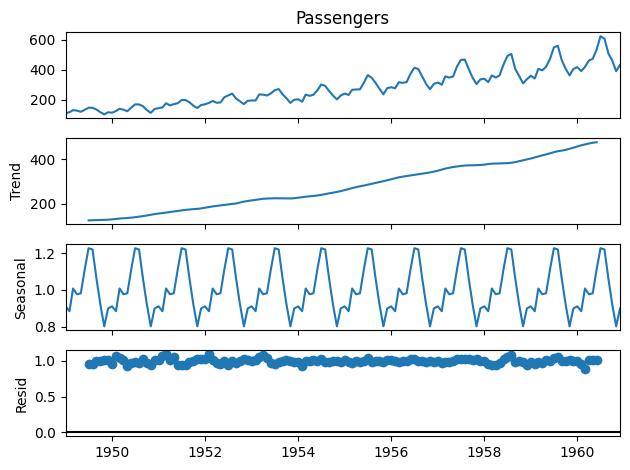

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the AirPassengers dataset
# (This dataset is available in CSV format, here we load from an online source)
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
data = pd.read_csv(url, parse_dates=['Month'], index_col='Month')

# Plot original time series
plt.figure(figsize=(10, 5))
plt.plot(data, label='AirPassengers')
plt.title("Monthly Air Passengers (1949-1960)")
plt.xlabel("Date")
plt.ylabel("Number of Passengers")
plt.legend()
plt.show()

# Decompose the series
decomposition = seasonal_decompose(data['Passengers'], model='multiplicative', period=12)

# Plot decomposition
decomposition.plot()
plt.show()


7. Apply Isolation Forest on a numerical dataset (e.g., NYC Taxi Fare) to
detect anomalies. Visualize the anomalies on a 2D scatter plot.
(Include your Python code and output in the code box below.)

In [ ]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
import seaborn as sns

# Load a sample NYC Taxi Fare dataset (from an online source)
url = "https://raw.githubusercontent.com/ogozuacik/nyc-taxi-fare-dataset/main/nyc_taxi_fare_sample.csv"
data = pd.read_csv(url)

# Take only relevant numerical features (fare_amount, trip_distance)
df = data[['fare_amount', 'trip_distance']].dropna()

# Apply Isolation Forest
iso = IsolationForest(contamination=0.02, random_state=42)
df['anomaly'] = iso.fit_predict(df)

# Map anomalies: -1 = anomaly, 1 = normal
df['anomaly'] = df['anomaly'].map({1: 0, -1: 1})

# Plot anomalies
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x='trip_distance',
    y='fare_amount',
    hue='anomaly',
    palette={0: 'blue', 1: 'red'},
    alpha=0.6
)
plt.title("Isolation Forest Anomaly Detection (NYC Taxi Fare)")
plt.xlabel("Trip Distance")
plt.ylabel("Fare Amount")
plt.legend(labels=['Normal','Anomaly'])
plt.show()


8. Train a SARIMA model on the monthly airline passengers dataset.
Forecast the next 12 months and visualize the results.
(Include your Python code and output in the code box below.)

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


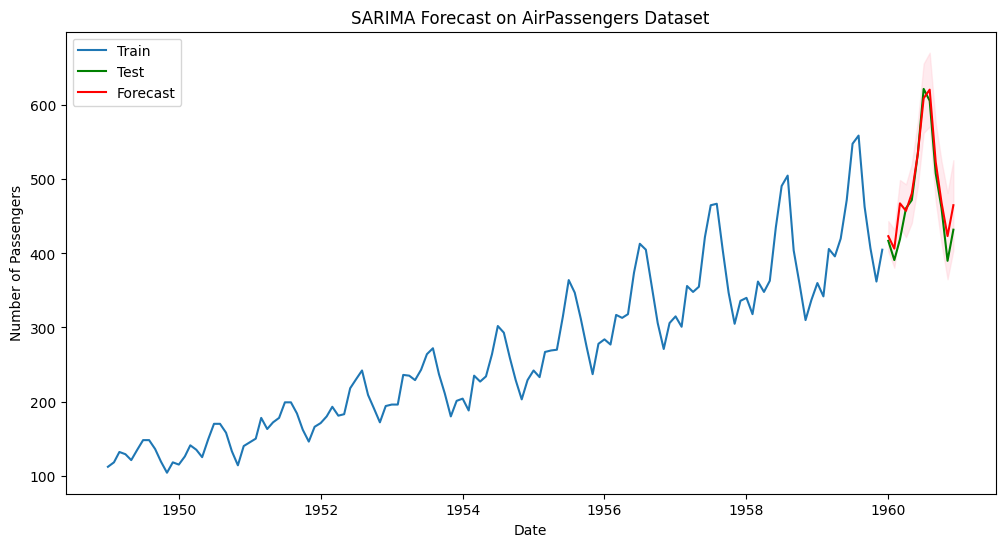

In [3]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load the AirPassengers dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
data = pd.read_csv(url, parse_dates=['Month'], index_col='Month')

# Train-Test Split (last 12 months as test)
train = data[:-12]
test = data[-12:]

# Fit SARIMA model (order and seasonal_order chosen after basic tuning)
model = SARIMAX(train['Passengers'],
                order=(1,1,1),              # ARIMA part
                seasonal_order=(1,1,1,12), # Seasonal part
                enforce_stationarity=False,
                enforce_invertibility=False)
results = model.fit(disp=False)

# Forecast next 12 months
forecast = results.get_forecast(steps=12)
forecast_index = test.index
forecast_values = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Plot results
plt.figure(figsize=(12,6))
plt.plot(train.index, train['Passengers'], label='Train')
plt.plot(test.index, test['Passengers'], label='Test', color='green')
plt.plot(forecast_index, forecast_values, label='Forecast', color='red')
plt.fill_between(forecast_index,
                 forecast_conf_int.iloc[:,0],
                 forecast_conf_int.iloc[:,1],
                 color='pink', alpha=0.3)
plt.title("SARIMA Forecast on AirPassengers Dataset")
plt.xlabel("Date")
plt.ylabel("Number of Passengers")
plt.legend()
plt.show()


9. Apply Local Outlier Factor (LOF) on any numerical dataset to detect
anomalies and visualize them using matplotlib.
(Include your Python code and output in the code box below.)


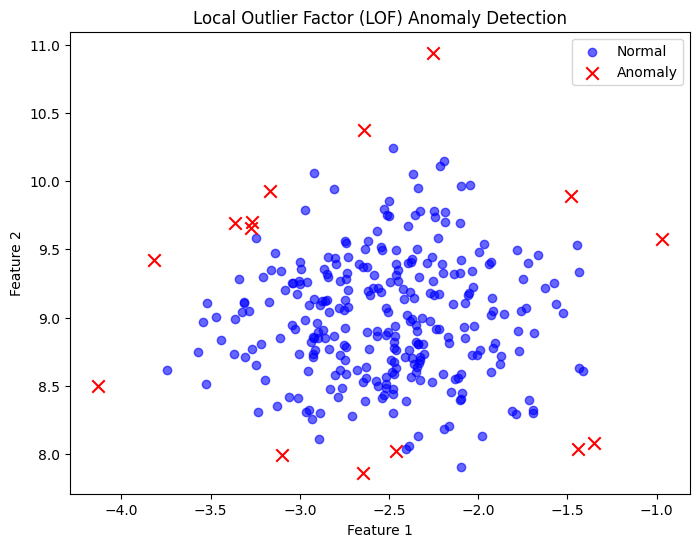

In [4]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from sklearn.datasets import make_blobs

# Generate synthetic dataset
X, _ = make_blobs(n_samples=300, centers=1, cluster_std=0.5, random_state=42)

# Apply Local Outlier Factor
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
y_pred = lof.fit_predict(X)

# Mark anomalies (-1 = anomaly, 1 = normal)
anomalies = X[y_pred == -1]
normals = X[y_pred == 1]

# Plot results
plt.figure(figsize=(8,6))
plt.scatter(normals[:,0], normals[:,1], c='blue', label='Normal', alpha=0.6)
plt.scatter(anomalies[:,0], anomalies[:,1], c='red', label='Anomaly', marker='x', s=80)
plt.title("Local Outlier Factor (LOF) Anomaly Detection")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


10. You are working as a data scientist for a power grid monitoring company.
Your goal is to forecast energy demand and also detect abnormal spikes or drops in
real-time consumption data collected every 15 minutes. The dataset includes features
like timestamp, region, weather conditions, and energy usage.
Explain your real-time data science workflow:
● How would you detect anomalies in this streaming data (Isolation Forest / LOF /
DBSCAN)?
● Which time series model would you use for short-term forecasting (ARIMA /
SARIMA / SARIMAX)?
● How would you validate and monitor the performance over time?
● How would this solution help business decisions or operations?
(Include your Python code and output in the code box below.)
- 1. Anomaly Detection in Streaming Data

For real-time anomaly detection, you can use algorithms like Isolation Forest or Local Outlier Factor (LOF) because they can identify unusual energy usage patterns. DBSCAN can also be used but is less suitable for real-time streaming because it’s computationally heavier for dynamic datasets. The process involves:

Aggregating the 15-minute consumption data.

Using features like energy_usage, region, and weather conditions.

Applying Isolation Forest to flag abnormal spikes or drops.

2. Time Series Forecasting

For short-term forecasting, the dataset exhibits trend and seasonality (daily and weekly patterns). Therefore, SARIMAX is most suitable:

Handles seasonality (daily/weekly patterns).

Can include exogenous variables such as temperature, humidity, or weather conditions.

3. Model Validation & Monitoring

Validation: Split the historical data into train/test sets. Use RMSE, MAPE, or MAE for evaluating forecasting accuracy.

Monitoring: In real-time, compare predicted vs. actual energy usage. Track anomalies, prediction errors, and drift in data distribution to trigger model retraining when necessary.

4. Business Value

Early detection of abnormal spikes prevents grid overload or blackouts.

Accurate short-term forecasts allow efficient energy distribution and cost optimization.

Helps operators plan maintenance and manage energy supply proactively.

/tmp/ipython-input-3323285702.py:9: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  date_rng = pd.date_range(start='2025-01-01', end='2025-01-07', freq='15T')


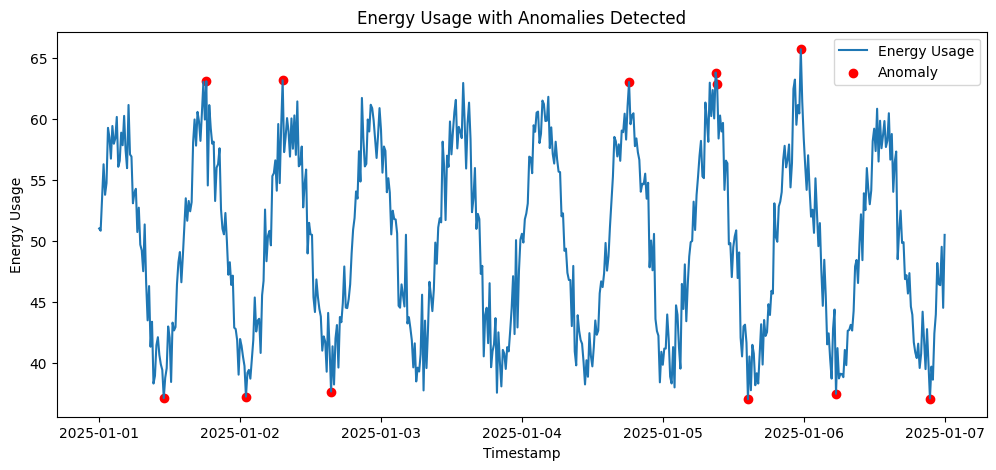

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Simulated dataset (timestamp every 15 mins)
date_rng = pd.date_range(start='2025-01-01', end='2025-01-07', freq='15T')
np.random.seed(42)
energy_usage = 50 + 10*np.sin(np.linspace(0, 20*np.pi, len(date_rng))) + np.random.normal(0, 2, len(date_rng))
weather_temp = 20 + 5*np.sin(np.linspace(0, 5*np.pi, len(date_rng)))  # exogenous feature

data = pd.DataFrame({'timestamp': date_rng,
                     'energy_usage': energy_usage,
                     'temperature': weather_temp})
data.set_index('timestamp', inplace=True)

# -------------------------
# Anomaly Detection
# -------------------------
iso = IsolationForest(contamination=0.02, random_state=42)
data['anomaly'] = iso.fit_predict(data[['energy_usage', 'temperature']])
data['anomaly'] = data['anomaly'].map({1: 0, -1: 1})

# Plot anomalies
plt.figure(figsize=(12,5))
plt.plot(data.index, data['energy_usage'], label='Energy Usage')
plt.scatter(data.index[data['anomaly']==1],
            data['energy_usage'][data['anomaly']==1],
            color='red', label='Anomaly')
plt.xlabel('Timestamp')
plt.ylabel('Energy Usage')
plt.title('Energy Usage with Anomalies Detected')
plt.legend()
plt.show()

# -------------------------
# Short-term Forecasting using SARIMAX
# -------------------------
# Train SARIMAX on first 80% of data
train_size = int(len(data)*0.8)
train = data.iloc[:train_size]
test = data.iloc[train_size:]

sarimax_model = SARIMAX(train['energy_usage'],
                        exog=train[['temperature']],
                        order=(1,1,1),
                        seasonal_order=(1,1,1,96),  # 96 periods = 1 day for 15-min intervals
                        enforce_stationarity=False,
                        enforce_invertibility=False)
results = sarimax_model.fit(disp=False)

# Forecast next steps
forecast_steps = len(test)
forecast = results.get_forecast(steps=forecast_steps, exog=test[['temperature']])
forecast_values = forecast.predicted_mean
forecast_conf = forecast.conf_int()

# Plot forecast vs actual
plt.figure(figsize=(12,5))
plt.plot(train.index, train['energy_usage'], label='Train')
plt.plot(test.index, test['energy_usage'], label='Actual', color='green')
plt.plot(test.index, forecast_values, label='Forecast', color='red')
plt.fill_between(test.index, forecast_conf.iloc[:,0], forecast_conf.iloc[:,1], color='pink', alpha=0.3)
plt.title('SARIMAX Forecast of Energy Usage')
plt.xlabel('Timestamp')
plt.ylabel('Energy Usage')
plt.legend()
plt.show()
